## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Get the data

In [2]:
df = pd.read_csv('../../../datasets/parte2/train.csv')

#### Columns

In [3]:
df.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)', 'dt', 'dt_iso',
       'city_name', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'shortwave_radiation',
       'direct_radiation', 'diffuse_radiation', 'direct_normal_irradiance',
       'terrestrial_radiation', 'shortwave_radiation_instant',
       'direct_radiation_instant', 'diffuse_radiation_instant',
       'direct_normal_irradiance_instant', 'terrestrial_radiation_instant'],
      dtype='object')

#### Shape

In [4]:
if 'Injeção na rede (kWh)' in df:
    df['Injeção na rede (kWh)'].value_counts()

In [5]:
df.shape

(11016, 31)

In [6]:
df.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),dt,dt_iso,city_name,temp,...,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,terrestrial_radiation_instant
0,2021-09-29,0,0.0,0.0,0.0,NaN,1632873600,2021-09-29 00:00:00+00:00,local,13.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-29,1,0.0,0.0,0.0,NaN,1632877200,2021-09-29 01:00:00+00:00,local,13.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-29,2,0.0,0.0,0.0,NaN,1632880800,2021-09-29 02:00:00+00:00,local,12.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-29,3,0.0,0.0,0.0,NaN,1632884400,2021-09-29 03:00:00+00:00,local,12.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-09-29,4,0.0,0.0,0.0,NaN,1632888000,2021-09-29 04:00:00+00:00,local,12.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The provided dataset consists of various features related to energy production from specific solar panels in the city of Braga. The dataset spans from September 2021 to April 2023 and is divided into two sets: one containing energy data for each year, and the other containing meteorological data.

For the energy datasets, the features include:

- Date: the timestamp associated with the record, in days.
- Hour: the hour associated with the record.
- Normal (kWh): amount of electric energy consumed from the electrical grid in a normal period within daily bi-hourly cycles (non-empty hours).
- Economy Schedule (kWh): amount of electric energy consumed from the electrical grid in an economic period within daily bi-hourly cycles (empty hours).
- Self-consumption (kWh): amount of electric energy consumed from solar panels.
- Grid Injection (kWh): amount of electric energy injected into the electrical grid from solar panels.

Regarding the meteorological datasets, the features include:

- dt: the timestamp associated with the record.
- dt_iso: the date associated with the record (up to seconds).
- city_name: the location under consideration (Braga, in this case).
- temp: temperature in °C.
- feels_like: perceived temperature in °C.
- temp_min: minimum perceived temperature in °C.
- temp_max: maximum perceived temperature in °C.
- pressure: atmospheric pressure in atm.
- sea_level: atmospheric pressure at sea level in atm.
- grnd_level: atmospheric pressure at local altitude in atm.
- humidity: humidity in percentage.
- wind_speed: wind speed in meters per second.
- rain_1h: average precipitation value in the last 1 hour.
- clouds_all: cloudiness level in percentage.
- weather_description: qualitative evaluation of the weather condition.

The datasets are prepared by concatenating the data for 2021 and 2022 for training the models, while the data for 2023 serves as a test set for prediction, with the target variable omitted. Additional columns related to radiation are added using the OpenMeteo Historical Weather API. The missing values in the columns 'sea_level,' 'grnd_level,' 'rain_1h,' and 'Grid Injection' are addressed by filling or replacing them accordingly. Finally, the correlated features 'temp,' 'feels_like,' 'temp_min,' and 'temp_max' are removed to prevent their influence on machine learning models.

#### Dataset info

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Data                              11016 non-null  object 
 1   Hora                              11016 non-null  int64  
 2   Normal (kWh)                      11016 non-null  float64
 3   Horário Económico (kWh)           11016 non-null  float64
 4   Autoconsumo (kWh)                 11016 non-null  float64
 5   Injeção na rede (kWh)             3239 non-null   object 
 6   dt                                11016 non-null  int64  
 7   dt_iso                            11016 non-null  object 
 8   city_name                         11016 non-null  object 
 9   temp                              11016 non-null  float64
 10  feels_like                        11016 non-null  float64
 11  temp_min                          11016 non-null  float64
 12  temp

#### Unique values

In [8]:
print(df["dt"].unique())
print(len(df["dt"].unique()))

print(df["city_name"].unique())
print(df["weather_description"].unique())

print(df["rain_1h"].unique())
print(len(df["rain_1h"].unique()))

[1632873600 1632877200 1632880800 ... 1672520400 1672524000 1672527600]
11016
['local']
['overcast clouds' 'broken clouds' 'few clouds' 'sky is clear'
 'scattered clouds' 'light rain' 'moderate rain' 'heavy intensity rain']
[ nan 1.   2.   3.   4.   7.   5.   0.13 0.42 0.35 0.58 0.31 0.97 1.75
 4.37 7.45 5.01 1.77 0.95 1.02 0.6  0.53 0.16 0.17 0.12 0.19 0.28 0.39
 0.89 1.16 1.32 2.16 6.15 6.89 5.93 3.51 2.12 0.54 0.15 0.14 0.59 0.93
 1.15 1.42 1.1  3.08 4.05 2.6  2.45 2.88 1.66 0.5  0.23 0.49 0.44 1.3
 3.19 2.78 1.84 0.74 0.24 0.25 0.48 0.64 0.46 0.85 0.73 1.51 1.01 1.98
 1.41 0.88 0.18 0.57 0.11 0.37 0.2  0.32 0.33 0.27 0.26 0.22 0.29 0.36
 0.68 3.15 1.6  0.47 0.34 0.69 0.78 0.92 1.19 1.48 0.86 0.38 0.82 1.07
 2.31 4.93 4.06 0.41 0.81 0.3  0.4  1.74 1.35 1.59 0.87 1.49 1.95 1.26
 1.89 1.7  2.48 2.38 0.7  0.21 0.56 1.36 1.47 0.72 1.13 1.38 1.22 0.45
 0.84 1.28 1.37 2.34 1.58 3.2  2.27 1.05 1.18 0.91 2.59 3.39 2.2  1.81
 1.52 1.23 0.65 0.63 0.52 1.94 3.84 2.09 0.51 0.55 0.1  2.64 3.33 2

#### Statistical dispersion

In [9]:
print(df.describe())


               Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
count  11016.000000  11016.000000             11016.000000       11016.000000   
mean      11.500000      0.202278                 0.159714           0.117314   
std        6.922501      0.349478                 0.271792           0.176762   
min        0.000000      0.000000                 0.000000           0.000000   
25%        5.750000      0.000000                 0.000000           0.000000   
50%       11.500000      0.000000                 0.000000           0.000000   
75%       17.250000      0.314000                 0.288000           0.227000   
max       23.000000      3.251000                 6.978000           1.192000   

                 dt          temp    feels_like      temp_min      temp_max  \
count  1.101600e+04  11016.000000  11016.000000  11016.000000  11016.000000   
mean   1.652701e+09     16.182991     15.826868     14.195064     17.288098   
std    1.144868e+07      5.756972

We can see that the 'Injeção na rede (kWh)' column contains object data type, which might need further exploration or conversion depending on the nature of the data. Additionally, the 'sea_level' and 'grnd_level' columns have all values as null, indicating that these columns might not provide useful information and could potentially be dropped.

#### Missing values

In [10]:
print(df.isna().sum())

Data                                    0
Hora                                    0
Normal (kWh)                            0
Horário Económico (kWh)                 0
Autoconsumo (kWh)                       0
Injeção na rede (kWh)                7777
dt                                      0
dt_iso                                  0
city_name                               0
temp                                    0
feels_like                              0
temp_min                                0
temp_max                                0
pressure                                0
sea_level                           11016
grnd_level                          11016
humidity                                0
wind_speed                              0
rain_1h                              8732
clouds_all                              0
weather_description                     0
shortwave_radiation                     0
direct_radiation                        0
diffuse_radiation                 

The output from df.isna().sum() provides information about the number of missing values in each column of the DataFrame. Here's a summary of the columns with missing values:

- 'Injeção na rede (kWh)': 7777 missing values.
- 'sea_level': 11016 missing values.
- 'grnd_level': 11016 missing values.
- 'rain_1h': 8732 missing values.

#### Filling missing value with 'None' in 'Injeção na rede (kWh)' column



In [11]:
df['Injeção na rede (kWh)'] = df['Injeção na rede (kWh)'].fillna("None")

In [12]:
print(df["Injeção na rede (kWh)"].unique())

['None' 'Low' 'Medium' 'High' 'Very High']


In [13]:
print(df.isna().sum())

Data                                    0
Hora                                    0
Normal (kWh)                            0
Horário Económico (kWh)                 0
Autoconsumo (kWh)                       0
Injeção na rede (kWh)                   0
dt                                      0
dt_iso                                  0
city_name                               0
temp                                    0
feels_like                              0
temp_min                                0
temp_max                                0
pressure                                0
sea_level                           11016
grnd_level                          11016
humidity                                0
wind_speed                              0
rain_1h                              8732
clouds_all                              0
weather_description                     0
shortwave_radiation                     0
direct_radiation                        0
diffuse_radiation                 

As we can see, after executing this code, if there aren´t any NaN values in the 'Injeção na rede (kWh)' column, they were replaced with the string "None". 

## Univariate Analysis

#### dt variable

In [14]:
df['dt'].value_counts()

dt
1632873600    1
1659322800    1
1659294000    1
1659297600    1
1659301200    1
             ..
1646096400    1
1646100000    1
1646103600    1
1646107200    1
1672527600    1
Name: count, Length: 11016, dtype: int64

## Multivariate Analysis

#### Features mean by class

In [15]:
df.groupby(by=['Injeção na rede (kWh)']).mean(numeric_only=True)

,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,...,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,terrestrial_radiation_instant
Injeção na rede (kWh),,,,,,,,,,,,,,,,,,,,,
High,12.528558,0.024011,0.000000,0.348349,1.651823e+09,20.608930,20.344406,17.740716,21.911568,1019.290118,...,509.278332,382.198549,127.079782,649.626927,800.298731,514.366727,385.319583,129.045966,650.615322,810.229284
Low,12.333333,0.191738,0.006877,0.247236,1.650907e+09,17.331551,17.073519,15.325185,18.372940,1018.199074,...,225.949074,119.789352,106.159722,294.611574,543.925926,223.341898,115.849074,107.494907,299.672685,549.086574
Medium,12.340619,0.109224,0.000125,0.358899,1.652600e+09,18.460783,18.124362,16.075364,19.566557,1018.417122,...,360.260474,235.567395,124.693078,466.114845,669.433971,363.612933,236.163934,127.447541,471.059199,681.873406
None,11.112768,0.256983,0.225833,0.030516,1.652836e+09,14.575590,14.169321,12.889850,15.558395,1018.278128,...,37.248039,18.783078,18.464961,58.055471,104.501980,33.937019,16.683927,17.253105,53.116986,98.649942
Very High,12.480198,0.000820,0.000000,0.280363,1.654022e+09,23.809653,23.824719,20.279257,26.168977,1018.394389,...,731.082508,602.013201,129.069307,784.094554,1028.703135,739.852475,609.094389,130.761056,784.094554,1041.362541


#### Outliers

<Axes: ylabel='Autoconsumo (kWh)'>

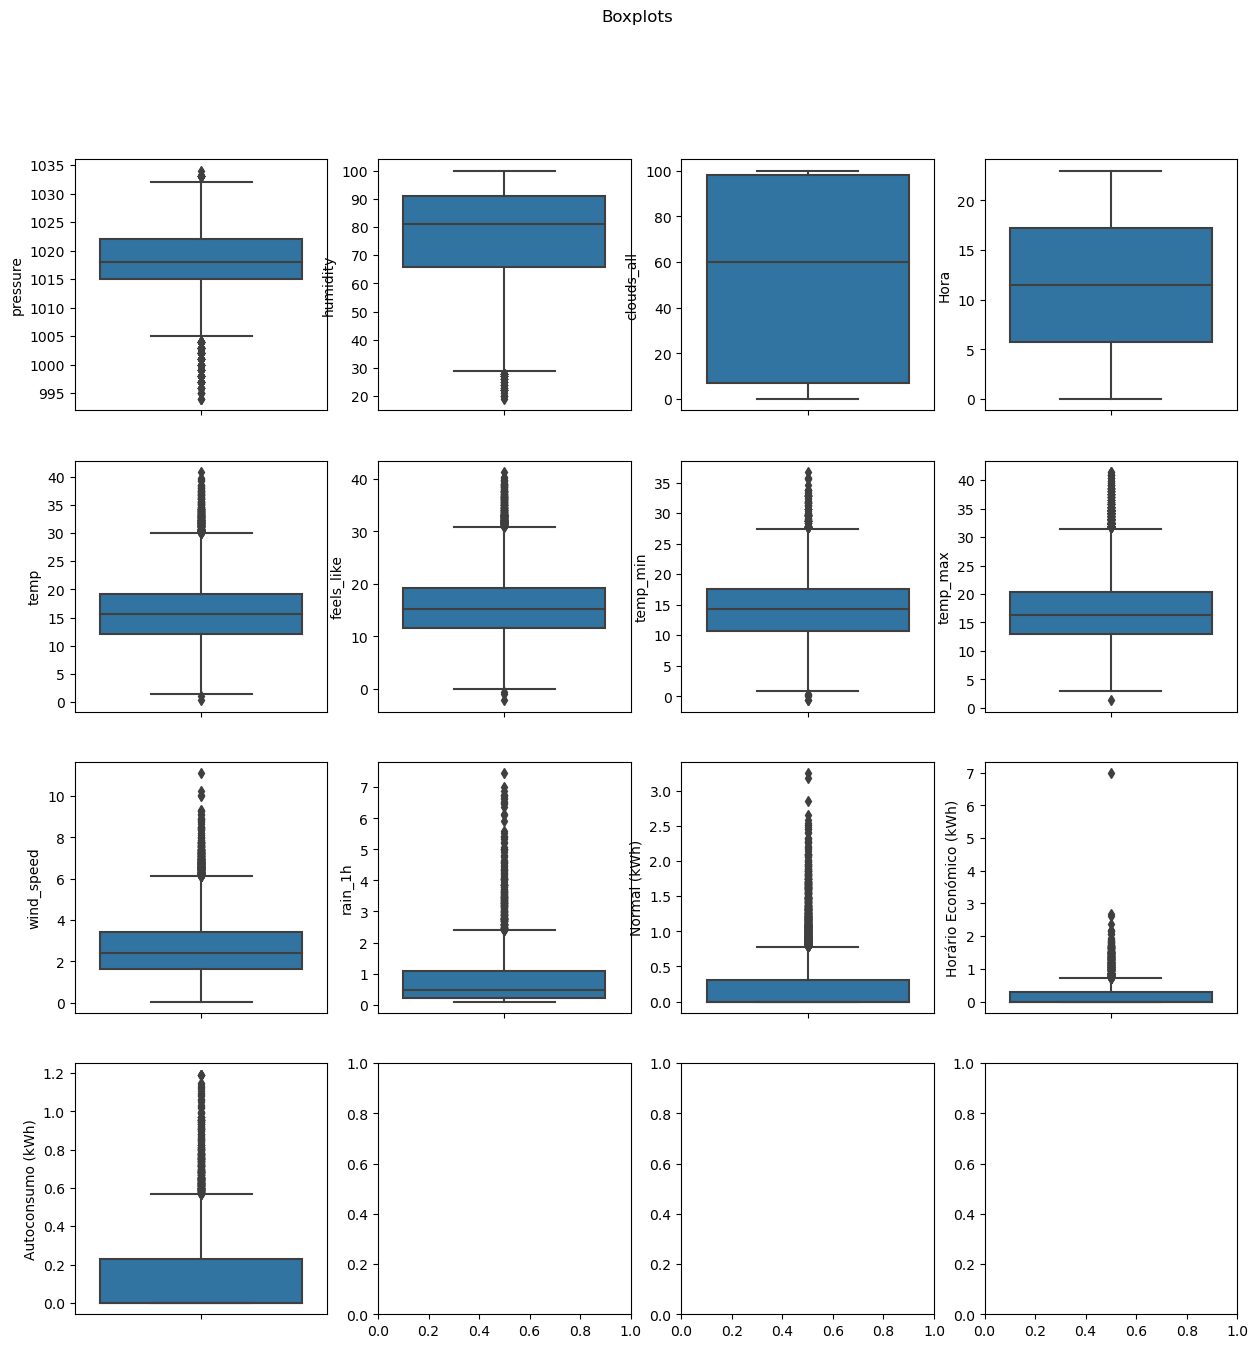

In [16]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle("Boxplots")

sns.boxplot(y=df["pressure"], ax=axs[0,0])
sns.boxplot(y=df["humidity"], ax=axs[0,1])
sns.boxplot(y=df["clouds_all"], ax=axs[0,2])
sns.boxplot(y=df["Hora"], ax=axs[0,3])
sns.boxplot(y=df["temp"], ax=axs[1,0])
sns.boxplot(y=df["feels_like"], ax=axs[1,1])
sns.boxplot(y=df["temp_min"], ax=axs[1,2])
sns.boxplot(y=df["temp_max"], ax=axs[1,3])
sns.boxplot(y=df["wind_speed"], ax=axs[2,0])
sns.boxplot(y=df["rain_1h"], ax=axs[2,1])
sns.boxplot(y=df["Normal (kWh)"], ax=axs[2,2])
sns.boxplot(y=df["Horário Económico (kWh)"], ax=axs[2,3])
sns.boxplot(y=df["Autoconsumo (kWh)"], ax=axs[3,0])

#### Statistical dispersion

<Axes: xlabel='Autoconsumo (kWh)', ylabel='Count'>

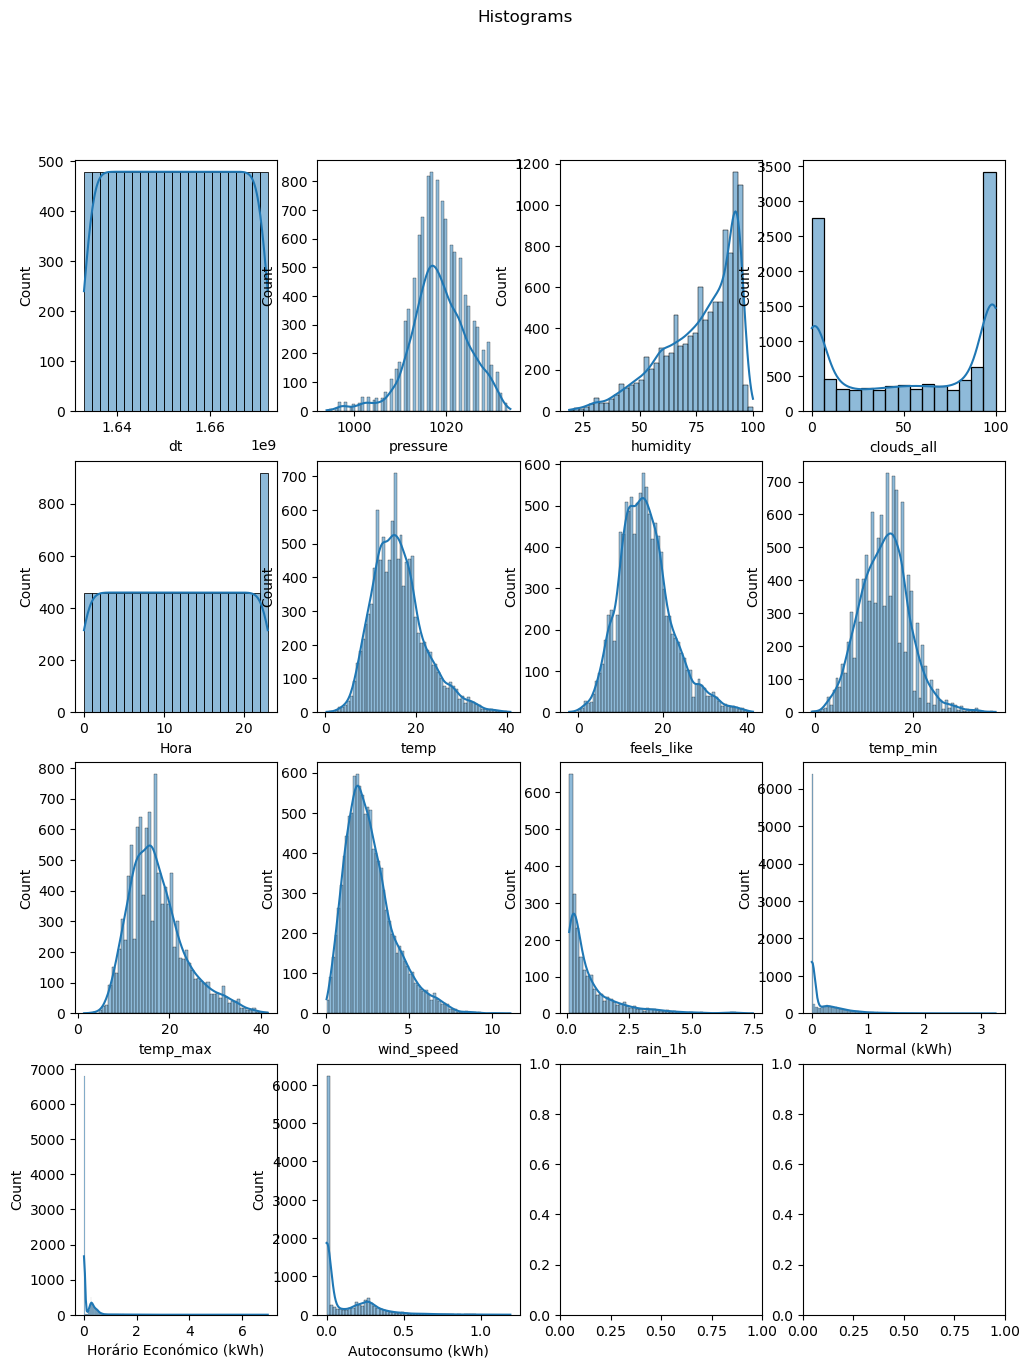

In [17]:
fig, axs = plt.subplots(4, 4, figsize=(12, 15))
fig.suptitle("Histograms")

sns.histplot(df["dt"], ax=axs[0,0], kde=True)
sns.histplot(df["pressure"], ax=axs[0,1], kde=True)
sns.histplot(df["humidity"], ax=axs[0,2], kde=True)
sns.histplot(df["clouds_all"], ax=axs[0,3], kde=True)
sns.histplot(df["Hora"], ax=axs[1,0], kde=True)
sns.histplot(df["temp"], ax=axs[1,1], kde=True)
sns.histplot(df["feels_like"], ax=axs[1,2], kde=True)
sns.histplot(df["temp_min"], ax=axs[1,3], kde=True)
sns.histplot(df["temp_max"], ax=axs[2,0], kde=True)
sns.histplot(df["wind_speed"], ax=axs[2,1], kde=True)
sns.histplot(df["rain_1h"], ax=axs[2,2], kde=True)
sns.histplot(df["Normal (kWh)"], ax=axs[2,3], kde=True)
sns.histplot(df["Horário Económico (kWh)"], ax=axs[3,0], kde=True)
sns.histplot(df["Autoconsumo (kWh)"], ax=axs[3,1], kde=True)

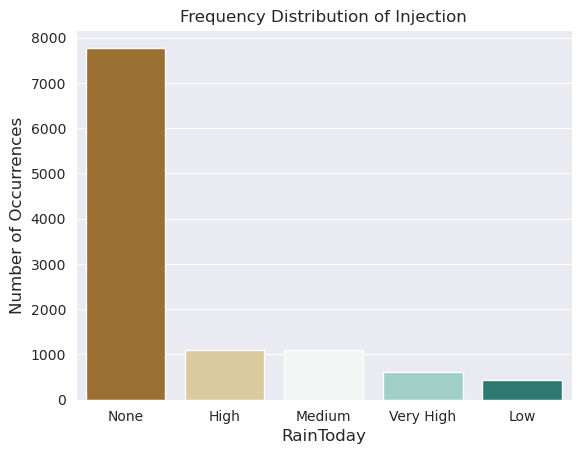

In [18]:
injection_count = df['Injeção na rede (kWh)'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=injection_count.index, y=injection_count.values, palette='BrBG')
plt.title('Frequency Distribution of Injection')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainToday', fontsize=12)
plt.show()

In [19]:
label_encoder = LabelEncoder()

df['Injeção na rede (kWh)'] = label_encoder.fit_transform(df['Injeção na rede (kWh)'])

df['Data'] = pd.to_datetime(df['Data'], format="%Y-%m-%d", utc=True)
df['year'] = df['Data'].dt.year
df['month'] = df['Data'].dt.month
df['day'] = df['Data'].dt.day
df.drop(['Data'], inplace=True, axis=1)

<Axes: >

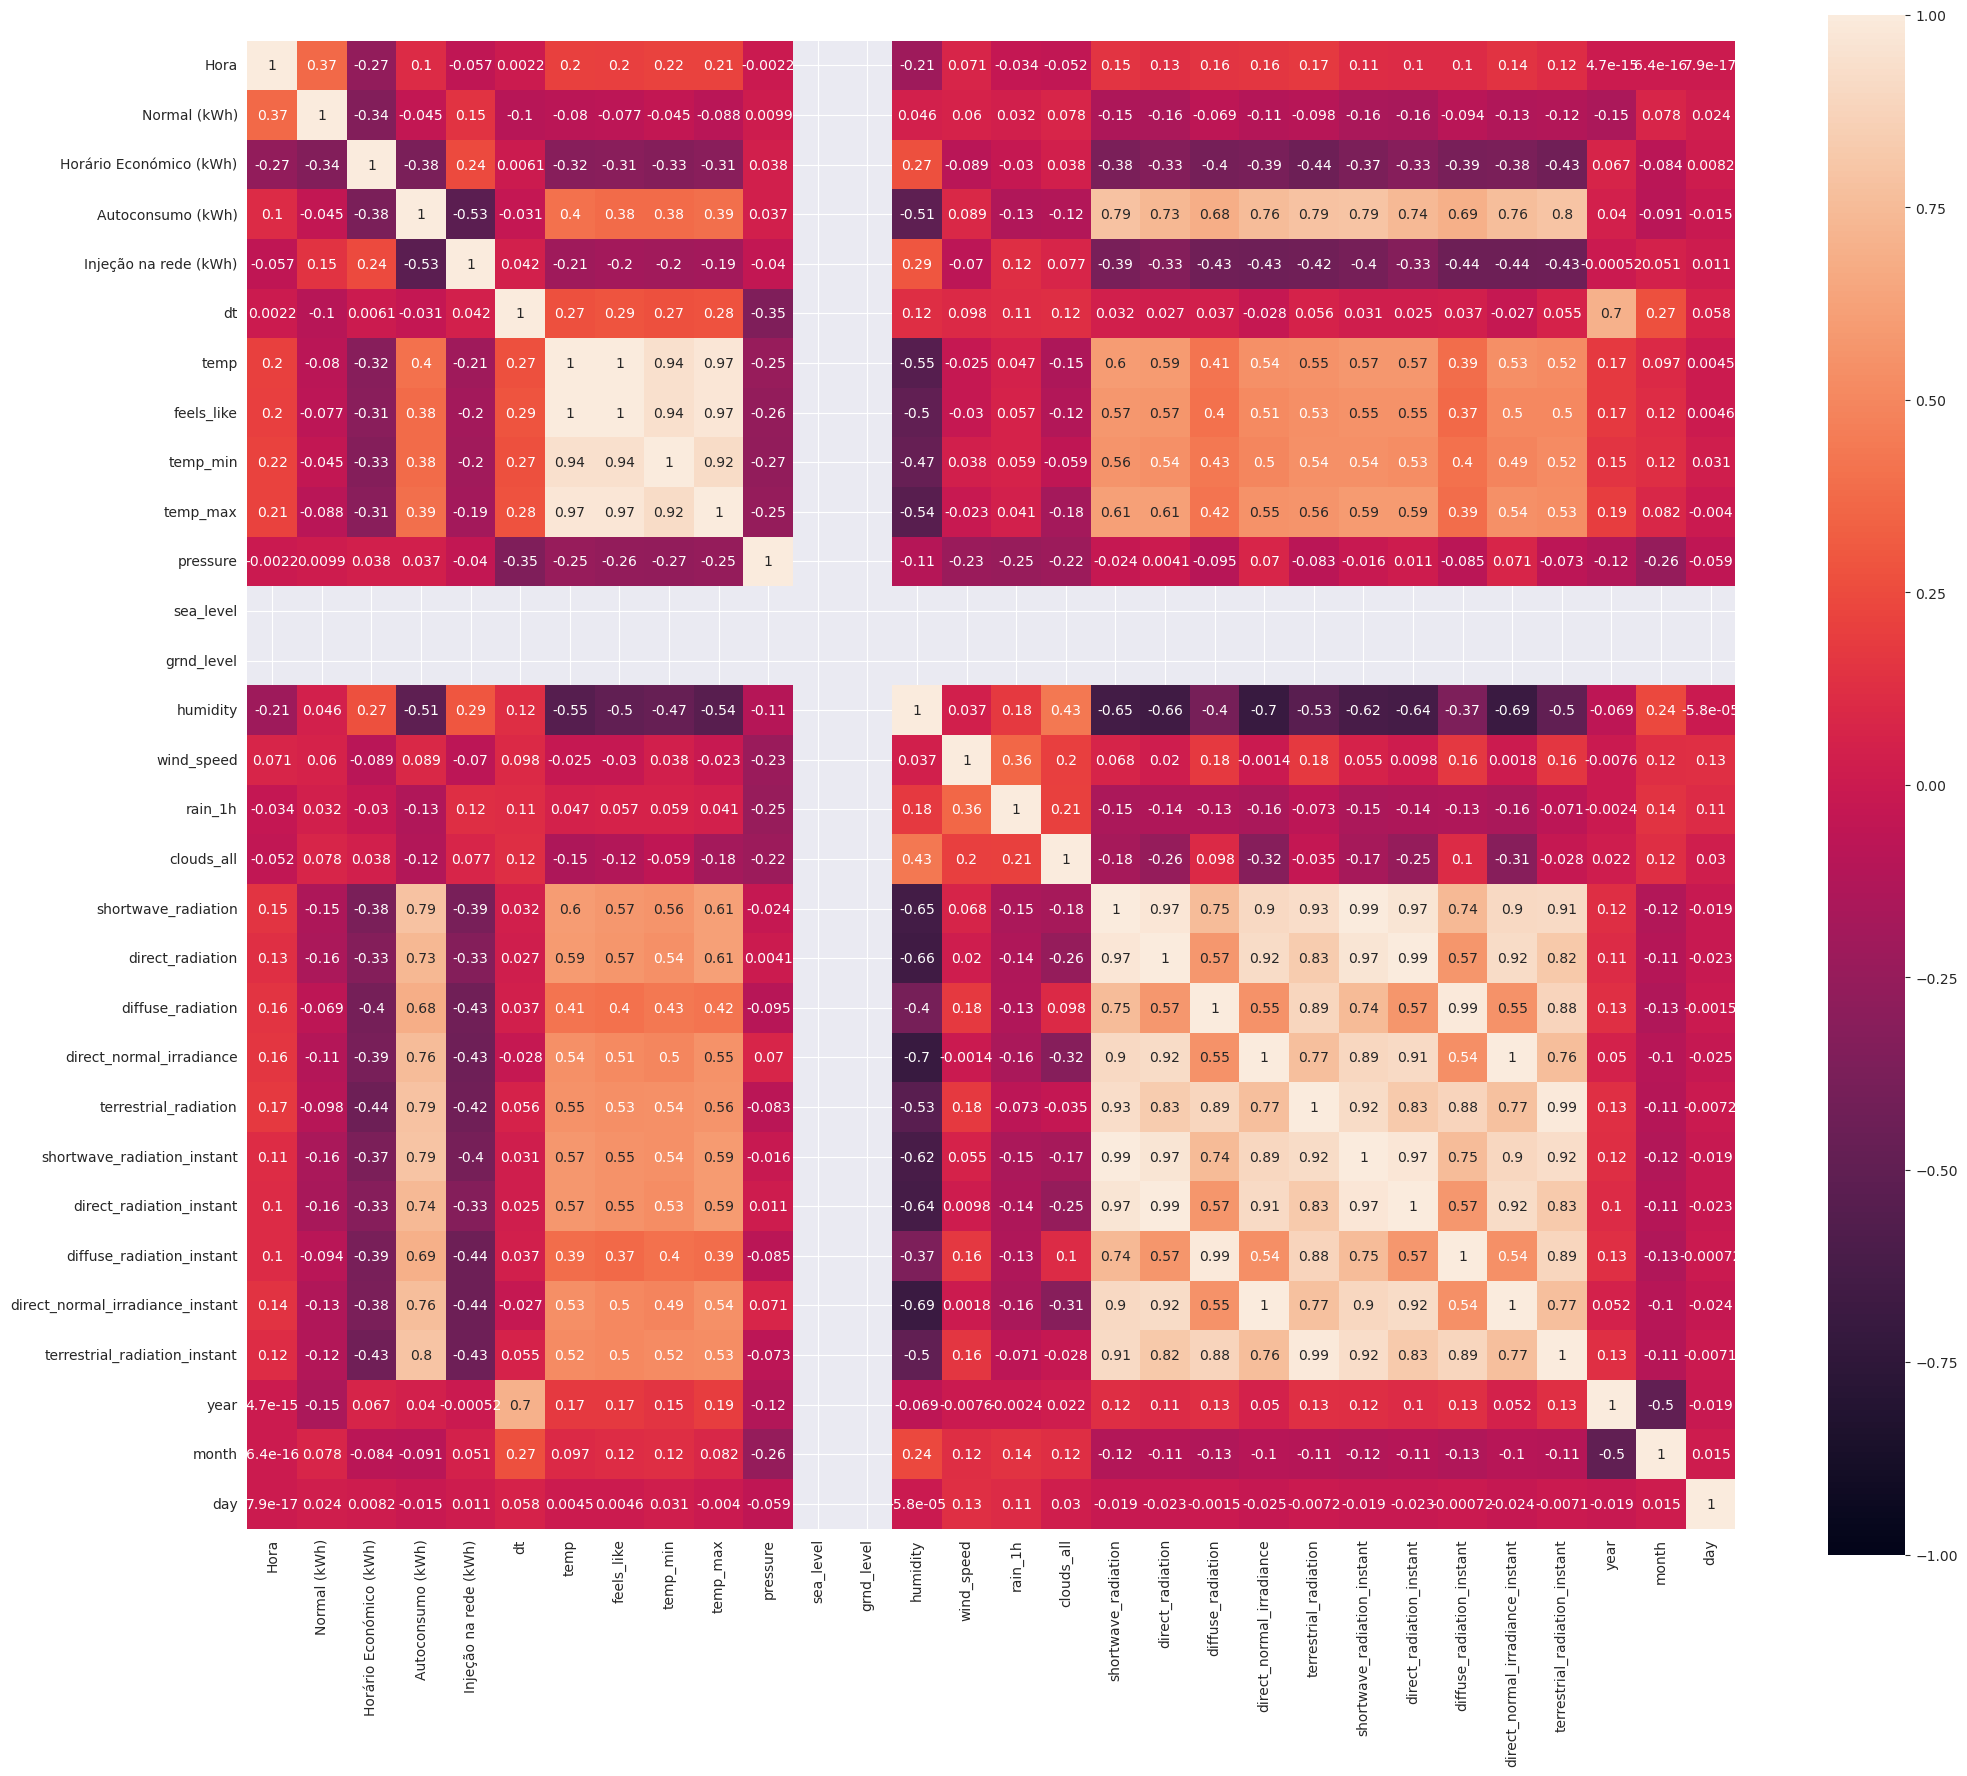

In [22]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(24, 20))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [23]:
print(corr_matrix["Injeção na rede (kWh)"])

Hora                               -0.057440
Normal (kWh)                        0.147976
Horário Económico (kWh)             0.242812
Autoconsumo (kWh)                  -0.527046
Injeção na rede (kWh)               1.000000
dt                                  0.041863
temp                               -0.209680
feels_like                         -0.195312
temp_min                           -0.199771
temp_max                           -0.193484
pressure                           -0.040450
sea_level                                NaN
grnd_level                               NaN
humidity                            0.292897
wind_speed                         -0.070369
rain_1h                             0.124366
clouds_all                          0.077215
shortwave_radiation                -0.389845
direct_radiation                   -0.330217
diffuse_radiation                  -0.429406
direct_normal_irradiance           -0.433041
terrestrial_radiation              -0.424895
shortwave_